In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-recommendations-on-steam/games_metadata.json
/kaggle/input/game-recommendations-on-steam/users.csv
/kaggle/input/game-recommendations-on-steam/games.csv
/kaggle/input/game-recommendations-on-steam/recommendations.csv


In [2]:
#Load data
steam_filepath = '../input/game-recommendations-on-steam/games.csv'

steam_data = pd.read_csv(steam_filepath)

In [3]:
steam_data.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [4]:
#rows and columns
steam_data.shape

(50796, 13)

In [5]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50796 non-null  int64  
 1   title           50796 non-null  object 
 2   date_release    50796 non-null  object 
 3   win             50796 non-null  bool   
 4   mac             50796 non-null  bool   
 5   linux           50796 non-null  bool   
 6   rating          50796 non-null  object 
 7   positive_ratio  50796 non-null  int64  
 8   user_reviews    50796 non-null  int64  
 9   price_final     50796 non-null  float64
 10  price_original  50796 non-null  float64
 11  discount        50796 non-null  float64
 12  steam_deck      50796 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [6]:
steam_data.columns.values

array(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'], dtype=object)

In [7]:
# Convert the "date_release" column to DateTime type
steam_data['date_release'] = pd.to_datetime(steam_data['date_release'])

# Get the first and last value
first_date = steam_data['date_release'].min()
last_date = steam_data['date_release'].max()

print("First date release :", first_date)
print("Last date release :", last_date)

First date release : 1997-06-30 00:00:00
Last date release : 2023-10-02 00:00:00


In [8]:
steam_data['date_release'] = pd.to_datetime(steam_data['date_release'])
steam_data['date_release'].dt.year.value_counts()

date_release
2022    7265
2021    6774
2020    6135
2018    5461
2019    5057
2017    4989
2016    4209
2023    3349
2015    2963
2014    1921
2013     822
2012     565
2011     376
2009     322
2010     284
2008     146
2007      82
2006      56
2004       4
2005       3
1999       3
2001       2
1997       2
2000       2
2003       2
2002       1
1998       1
Name: count, dtype: int64

# Number of Steam Games Released per Year

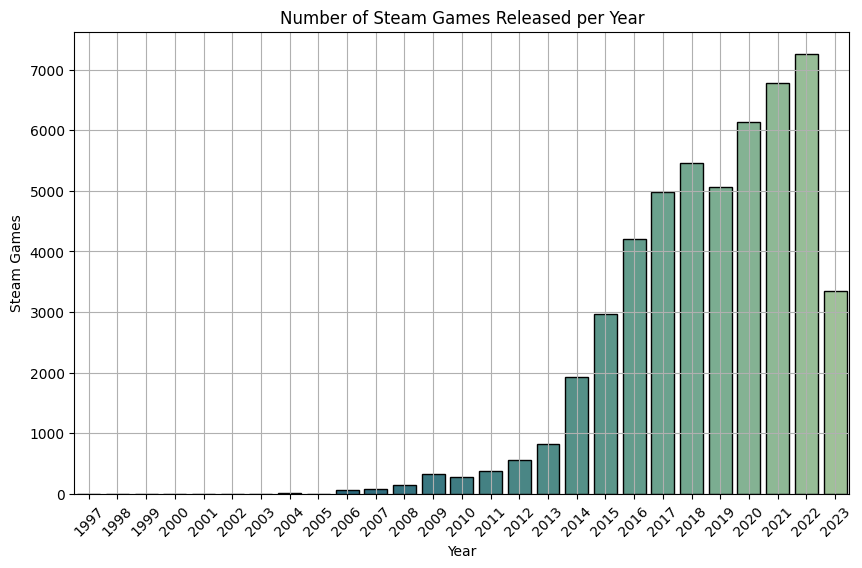

In [9]:
steam_data['date_release'] = pd.to_datetime(steam_data['date_release'])

year_count = steam_data['date_release'].dt.year.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=year_count.index, y=year_count.values, palette='crest_r' ,edgecolor='k')
plt.ylabel('Steam Games', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.title('Number of Steam Games Released per Year')
plt.xticks(rotation=45) 
plt.grid(True)

plt.show()

In [10]:
#highest and lowest price
price_min = steam_data['price_final'].min()
price_max = steam_data['price_final'].max()

print("Lower price:", price_min)
print("Max price:", price_max)


Lower price: 0.0
Max price: 299.99


In [11]:
steam_data['price_final'].value_counts()

price_final
0.00     9101
9.99     5072
4.99     4680
0.99     3089
19.99    3053
         ... 
90.00       1
19.95       1
27.00       1
63.99       1
48.00       1
Name: count, Length: 434, dtype: int64

# Game Price Distribution

In [12]:
df = steam_data

fig = px.scatter(df, x=df.index, y='price_final', title='Game Price Distribution',template='ggplot2',
                 labels={'index': 'Steam Games', 'price_final': 'Price'})

fig.update_traces(hovertemplate='<b>Títle:</b> %{text}<br><b>Price:</b> $%{y:.2f}', text=df['title'])

fig.show()


# Distribution of non-exclusive Games on Windows, Mac and Linux

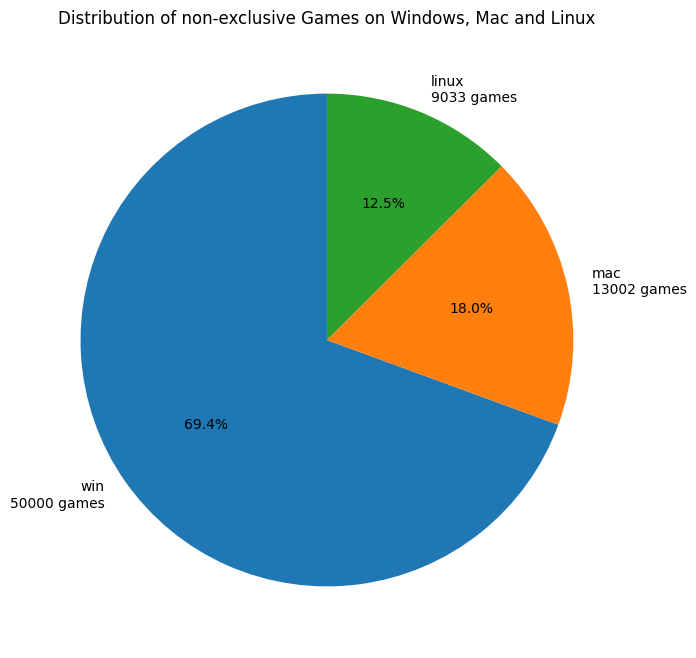

In [13]:

platform_counts = steam_data[['win', 'mac', 'linux']].sum()
platforms = platform_counts.index

plt.figure(figsize=(8, 8))
_, labels, autopct = plt.pie(platform_counts, labels=platforms, autopct=lambda p: f'{p:.1f}%' ,startangle=90)

cantidades = [f'{c} games' for c in platform_counts]


for i, label in enumerate(labels):
    label.set_text(f'{platforms[i]}\n{cantidades[i]}')

plt.title('Distribution of non-exclusive Games on Windows, Mac and Linux')
plt.show()

In [14]:
steam_data.rating.unique()


array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [15]:
 steam_data.rating.value_counts()

rating
Positive                   13492
Very Positive              13107
Mixed                      12135
Mostly Positive             8727
Mostly Negative             1848
Overwhelmingly Positive     1110
Negative                     303
Very Negative                 60
Overwhelmingly Negative       14
Name: count, dtype: int64

In [16]:
#Overwhelmingly Negative Titles
overwhelmingly_negative_games = steam_data[steam_data['rating'] == 'Overwhelmingly Negative']

titles_overwhelmingly_negative = overwhelmingly_negative_games['title']

print(titles_overwhelmingly_negative)

3191                             War of the Three Kingdoms
3386          Expansion - Europa Universalis IV: Leviathan
12843    Sid Meier's Civilization® VI: Vikings Scenario...
14190                                         Overwatch® 2
21930                          Tricolour Lovestory TrueEnd
22522                                         O2Jam Online
28370                                               Malice
29104                               Airport Simulator 2014
30635                                         SuperPower 3
33974                       Flatout 3: Chaos & Destruction
34240                 TEKKEN 7 - DLC13: Frame Data Display
36294                                       Spacebase DF-9
37536     Tom Clancy's Ghost Recon® Wildlands - Narco Road
41713                                         Kinetic Void
Name: title, dtype: object


# Games with an "Overwhelmingly Positive" Rating 

In [17]:
#Games with an "Overwhelmingly Positive" Rating 
overwhelmingly_positive_popular_games = steam_data[(steam_data['rating'] == 'Overwhelmingly Positive') & (steam_data['user_reviews'] > 40000 )]

fig = px.scatter(overwhelmingly_positive_popular_games, x='title', y='price_final', title='Games with an "Overwhelmingly Positive" Rating and 40000+ Reviews',
                template='plotly_dark')

fig.update_layout(xaxis_title="Game Title", yaxis_title="Price")

fig.update_xaxes(tickangle=60)

fig.show()



# Games with a "Very Positive" Rating

In [18]:
#Games with a "Very Positive" Rating
very_positive_popular_games = steam_data[(steam_data['rating'] == 'Very Positive') & (steam_data['user_reviews'] > 100000 )]

fig = px.scatter(very_positive_popular_games, x='title', y='price_final', title='Games with a "Very Positive" Rating and 100000+ Reviews'
                ,template='plotly_dark')

fig.update_layout(xaxis_title="Game Title", yaxis_title="Price")

fig.update_xaxes(tickangle=60)

fig.show()


# Games or DLC with an "Overwhelmingly Negative" Rating

In [19]:
overwhelmingly_negative_games = steam_data[(steam_data['rating'] == 'Overwhelmingly Negative')]

fig = px.scatter(overwhelmingly_negative_games, x='title', y='price_final', title='Games or DLC with an "Overwhelmingly Negative" Rating'
                ,template='plotly_dark')

fig.update_layout(xaxis_title="Game Title", yaxis_title="Price")

fig.update_xaxes(tickangle=45)

fig.show()


# Steam review distribution

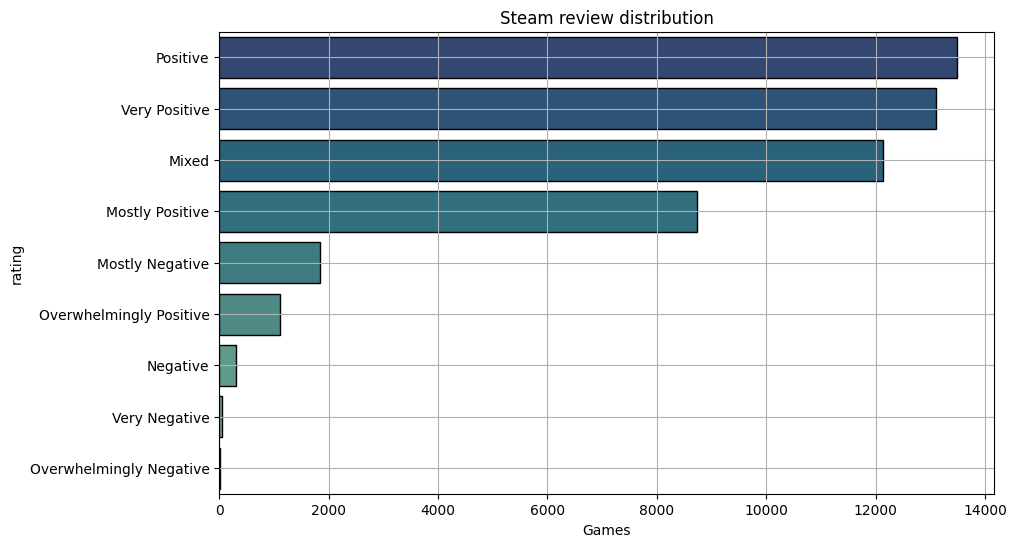

In [20]:
custom_order = [
     'Positive','Very Positive', 'Mixed', 'Mostly Positive',
     'Mostly Negative', 'Overwhelmingly Positive',
     'Negative',  'Very Negative','Overwhelmingly Negative'
]
ratings_count= steam_data.rating.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=custom_order, x=ratings_count, palette='crest_r' ,edgecolor='k')
plt.ylabel('rating',fontsize=10)
plt.xlabel('Games',fontsize=10)
plt.title('Steam review distribution')
plt.grid(True)
plt.show()

In [21]:
#Game with the biggest discount
steam_data[steam_data['discount'] == steam_data['discount'].max()]['title'].values[0]

'The Deal'

In [22]:
#Games supported by Steam Deck
steam_data.steam_deck.value_counts()

steam_deck
True     50794
False        2
Name: count, dtype: int64

# Average Price of Games over Time

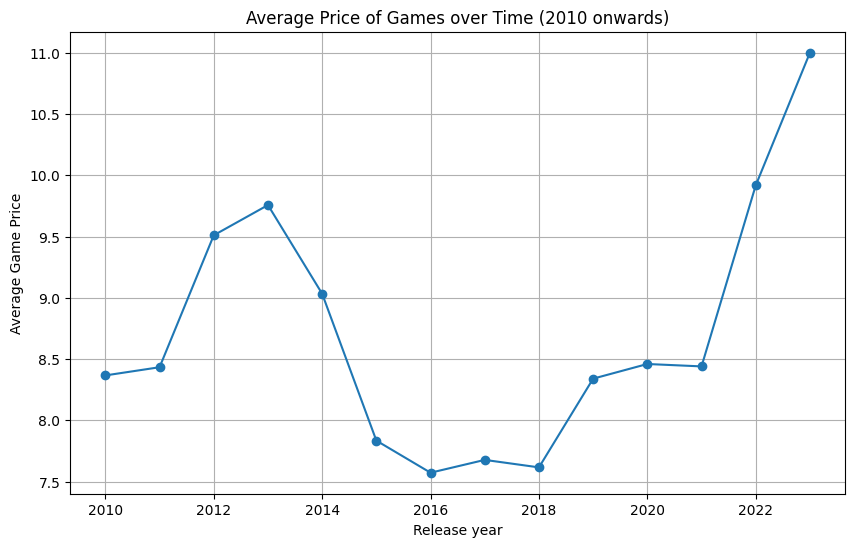

In [23]:
#Average Price of Games over Time
df['date_release'] = pd.to_datetime(df['date_release'])

df = df[df['date_release'].dt.year >= 2010]

average_prices = df.groupby(df['date_release'].dt.year)['price_final'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_prices.index, average_prices.values, marker='o')
plt.xlabel('Release year')
plt.ylabel('Average Game Price')
plt.title('Average Price of Games over Time (2010 onwards)')
plt.grid(True)

plt.show()